<a href="https://colab.research.google.com/github/2303a52163/Generative-AI-2025/blob/main/2303A52163_WEEK5_1_ASSIGNMENT_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

design a multi-layer ANN architecture with one input, one hidden, and one output
layer. Assume a linear activation function in the output layer and a sigmoid activation function
in the hidden layer.
• Write Python code for a backpropagation algorithm with gradient descent optimization to
update weights and bias parameters of the ANN model with training data shown in Table
1.
• Calculate the mean square error with training and testing data shown in Table 2.
• Write Python code that reads the input data [x1 and x2] from the user. Predict the output
with deployed ANN model

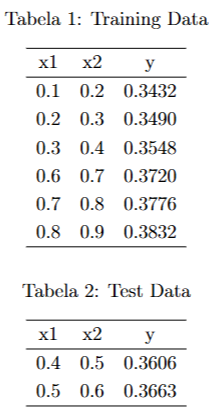

In [ ]:

import numpy as np
def sig(x): return 1 / (1 + np.exp(-x))
def train(X, y, h=2, lr=0.1, epochs=10000):
    np.random.seed(1)
    w1, b1, w2, b2 = np.random.rand(2, h), np.random.rand(h), np.random.rand(h, 1), np.random.rand(1)
    for _ in range(epochs):
        h_out = sig(np.dot(X, w1) + b1)
        y_out = np.dot(h_out, w2) + b2
        err = y - y_out
        w2 += np.dot(h_out.T, err) * lr
        b2 += np.sum(err) * lr
        w1 += np.dot(X.T, (np.dot(err, w2.T) * h_out * (1 - h_out))) * lr
        b1 += np.sum((np.dot(err, w2.T) * h_out * (1 - h_out)), axis=0) * lr
    return w1, b1, w2, b2

def pred(X, w1, b1, w2, b2): return np.dot(sig(np.dot(X, w1) + b1), w2) + b2

def mse(y, y_pred): return np.mean((y - y_pred) ** 2)

X_train = np.array([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9]])
y_train = np.array([[0.3432], [0.349], [0.3548], [0.372], [0.3776], [0.3832]])
w1, b1, w2, b2 = train(X_train, y_train)

X_test = np.array([[0.4, 0.5], [0.5, 0.6]])
y_test = np.array([[0.3606], [0.3663]])

print("Train MSE:", mse(y_train, pred(X_train, w1, b1, w2, b2)))
print("Test MSE:", mse(y_test, pred(X_test, w1, b1, w2, b2)))

x_input = np.array([list(map(float, input("Enter x1 x2: ").split()))])
print("Predicted:", pred(x_input, w1, b1, w2, b2)[0][0])

Train MSE: 4.625425693875935e-08
Test MSE: 1.1104836010556062e-07
Enter x1 x2: 0.4 0.5
Predicted: 0.3609087497412966
